<a href="https://colab.research.google.com/github/parsamirzakhani/ai4032_parsa_mirzakhani/blob/main/finalprojectai_parsamirzakhani_40123223ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [54]:
import pandas as pd


download_url = f"/content/drive/MyDrive/Colab Notebooks/project_dataset.csv"

df = pd.read_csv(download_url)
print(df.head())

df2 = df.copy



   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
df = df.drop_duplicates(keep = 'last')

In [15]:
df['label'] = df['label'].map({'male': 0, 'female': 1})

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3166.0,0.180886,0.029916,0.039363,0.163649,0.184814,0.199118,0.251124
sd,3166.0,0.057130,0.016656,0.018363,0.041942,0.059162,0.067023,0.115273
median,3166.0,0.185593,0.036354,0.010975,0.169578,0.190016,0.210588,0.261224
Q25,3166.0,0.140440,0.048687,0.000229,0.111086,0.140255,0.175931,0.247347
Q75,3166.0,0.224748,0.023636,0.042946,0.208740,0.225668,0.243640,0.273469
IQR,3166.0,0.084308,0.042790,0.014558,0.042538,0.094280,0.114168,0.252225
skew,3166.0,3.140895,4.241768,0.141735,1.649353,2.197623,2.932527,34.725453
kurt,3166.0,36.587139,134.969236,2.068455,5.666817,8.327893,13.649803,1309.612887
sp.ent,3166.0,0.895144,0.044988,0.738651,0.861823,0.901823,0.928717,0.981997
sfm,3166.0,0.408348,0.177476,0.036876,0.258126,0.396472,0.533795,0.842936


In [24]:
outliner_features = ['skew', 'kurt', 'meandom', 'maxdom', 'dfrange']
df_filtered = df.copy()
for col in outliner_features:
  Q1 = df_filtered[col].quantile(0.25)
  Q3 = df_filtered[col].quantile(0.75)
  IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

print(f"original shape: {df.shape}")
print(f"filtered shape: {df_filtered.shape}")

original shape: (3166, 21)
filtered shape: (3125, 21)


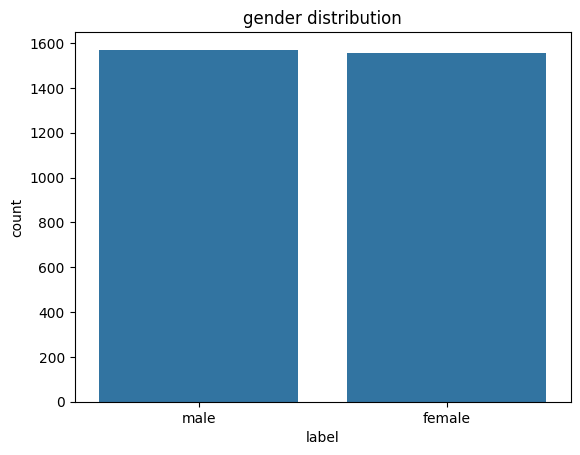

In [25]:
sns.countplot(x = 'label', data = df_filtered)
plt.title('gender distribution')
plt.xticks([0, 1], ['male', 'female'])
plt.show()

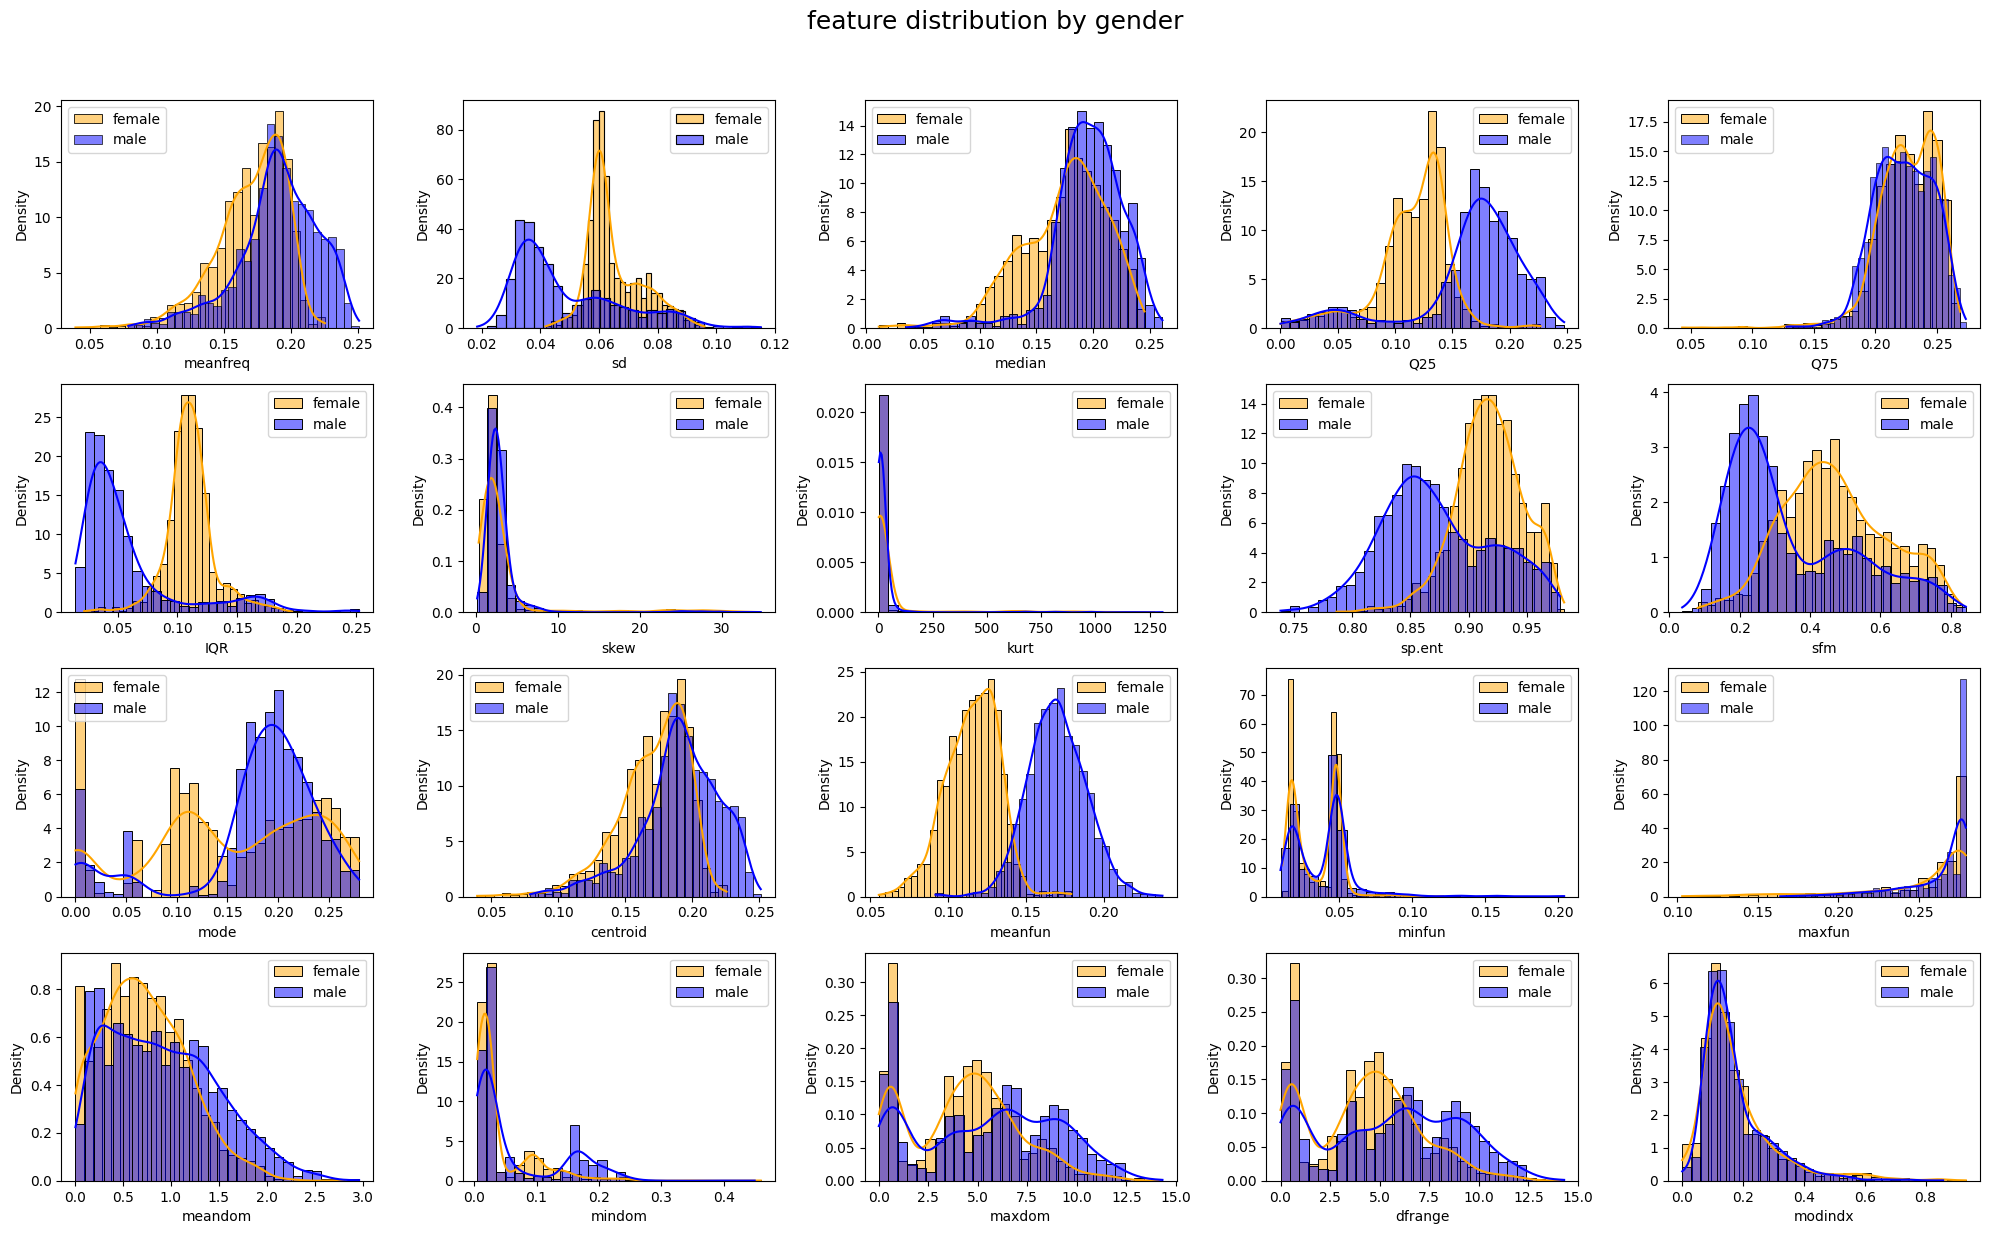

In [30]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in df_filtered.drop('label', axis = 1).columns:
  plt.subplot(5, 5, j+1)
  j += 1
  sns.histplot(df_filtered[i][df_filtered['label'] == 0], color = 'orange', label = 'female', kde = True, stat = 'density', bins = 30)
  sns.histplot(df_filtered[i][df_filtered['label'] == 1], color = 'blue', label = 'male', kde = True, stat = 'density', bins = 30)
  plt.legend(loc = 'best')
  plt.tight_layout()
fig.suptitle('feature distribution by gender', fontsize = 18)
fig.subplots_adjust(top = 0.92)
plt.show()

In [31]:
X = df_filtered.drop('label', axis = 1)
y = df_filtered['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

In [38]:
def test_model(name, y_true, y_pred):
  print(f"\n{name} results:")
  print("accuracy:", accuracy_score(y_true, y_pred))
  print("classification report:\n", classification_report(y_true, y_pred))
  sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
  plt.title(f"{name} Confusion Matrix")
  plt.xlabel("predicted")
  plt.ylabel("actual")
  plt.show()


base SVM results:
accuracy: 0.9792
classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       314
           1       0.97      0.99      0.98       311

    accuracy                           0.98       625
   macro avg       0.98      0.98      0.98       625
weighted avg       0.98      0.98      0.98       625



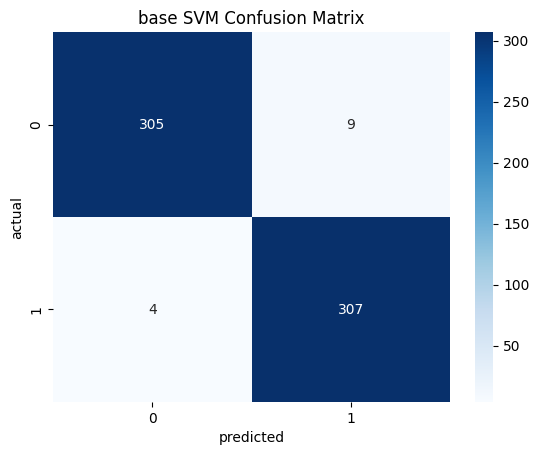


base random forest: results:
accuracy: 0.9776
classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       314
           1       0.97      0.99      0.98       311

    accuracy                           0.98       625
   macro avg       0.98      0.98      0.98       625
weighted avg       0.98      0.98      0.98       625



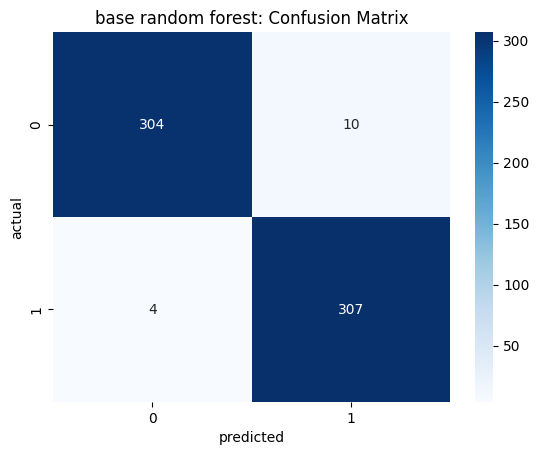


base logistic regression: results:
accuracy: 0.9712
classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       314
           1       0.97      0.98      0.97       311

    accuracy                           0.97       625
   macro avg       0.97      0.97      0.97       625
weighted avg       0.97      0.97      0.97       625



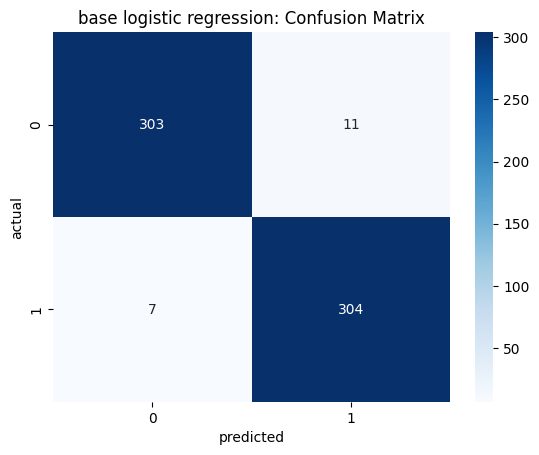

In [39]:
svm = SVC()
svm.fit(X_train, y_train)
test_model("base SVM", y_test, svm.predict(X_test))


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
test_model("base random forest:", y_test, rf.predict(X_test))

lr = LogisticRegression()
lr.fit(X_train, y_train)
test_model("base logistic regression:", y_test, lr.predict(X_test))


In [44]:
def tune_model(model, param_grid, X, y):
 grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy' , n_jobs = -1)
 grid.fit(X, y)
 print(f"best parameters: {grid.best_params_}")
 print(f"best cross-validated accuracy: {grid.best_score_:.4f}")
 return grid.best_estimator_

tuning SVM...
best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
best cross-validated accuracy: 0.9816

tuned svm results:
accuracy: 0.9792
classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       314
           1       0.97      0.99      0.98       311

    accuracy                           0.98       625
   macro avg       0.98      0.98      0.98       625
weighted avg       0.98      0.98      0.98       625



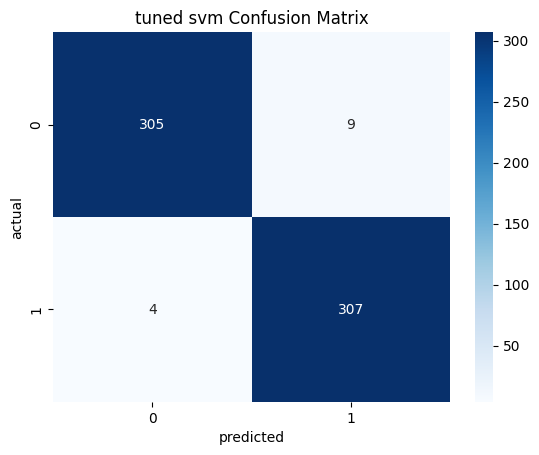

In [45]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}
print("tuning SVM...")
best_svm = tune_model(SVC(), svm_params, X_train, y_train)
test_model("tuned svm", y_test, best_svm.predict(X_test))


In [57]:
download_url = f"/content/drive/MyDrive/Colab Notebooks/part2_dataset.csv"

dfr = pd.read_csv(download_url)

In [58]:
dfr.label.value_counts()

,count
label,
matured,1983
young,1816
old,562


In [59]:
dict = {'label':{'old':2,'matured':1,'young':0}}
dfr.replace(dict,inplace = True)
X = dfr.loc[:, dfr.columns != 'label']
y = dfr.loc[:,'label']

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)

In [65]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}
print("tuning SVM...")
best_svm = tune_model(SVC(), svm_params, X_train2, y_train2)
test_model("tuned svm", y_test2, best_svm.predict(X_tes2t))


tuning SVM...


KeyboardInterrupt: 